-Ev Fiyatları verilerini Kaggle'dan indirin.
-Verilerinizi eğitim ve test kümelerine ayırın.
-Modelinizi eğitim kümesinden önceki derste olduğu gibi oluşturun. Modelinizin uygunluğunu değerlendirin.
-Test kümesindeki ev fiyatlarını tahmin edin ve bu derste belirttiğimiz metrikleri kullanarak modelinizin performansını değerlendirin.
-Modelinizin performansı tatmin edici mi? Açıklayın.
-Bazı değişkenleri ekleyerek veya çıkararak modelinizi tahmin performansı açısından geliştirmeye çalışın.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm
from matplotlib.ticker import FuncFormatter
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import norm,bernoulli, exponnorm
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
import warnings
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
warnings.filterwarnings('ignore')

In [2]:
#Importing the data
houses_df = pd.read_csv('train.csv')
numerical_features = houses_df.dtypes[houses_df.dtypes != "object"].index
categoricel_features = houses_df.dtypes[houses_df.dtypes == "object"].index
#missing data
total = houses_df.isnull().sum().sort_values(ascending=False)
percent = (houses_df.isnull().sum()/houses_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#dealing with missing data
houses_df = houses_df.drop((missing_data[missing_data['Total'] > 1]).index,1)
houses_df = houses_df.drop(houses_df.loc[houses_df['Electrical'].isnull()].index)
corr_list = list(np.abs(houses_df.corr().iloc[-1, 0:-1]).sort_values(ascending=False)[0:20].index)

In [3]:
X = houses_df[corr_list]
y = houses_df.SalePrice
lrm = LinearRegression()
lrm.fit(X, y)
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [ 1.93492209e+04  1.61275432e+01  9.76150104e+03  1.00341561e+01
  1.44303742e+01  3.11414950e+01 -1.16938023e+03  4.11450462e+03
  2.10953693e+02  2.82372506e+02  5.97713148e+03  1.16314937e+01
  2.67230269e+01  2.71481876e+01  3.02277792e+00 -8.27950641e+02
  4.73190201e-01  4.66643569e+03 -1.73489859e+00 -7.30819922e+03]
Sabit değer (bias): 
 -1041931.840303148


In [4]:
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     278.6
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        17:26:38   Log-Likelihood:                -17376.
No. Observations:                1459   AIC:                         3.479e+04
Df Residuals:                    1438   BIC:                         3.491e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.042e+06   1.33e+05     -7.832      0.000    -1.3e+06   -7.81e+05
OverallQual   1.935e+04   1183.257     16.353      0.000     1.7e+04    2.17e+04
GrLivArea       16.1275     20.263      0.796      0.426     -23.621      55.876
GarageCars    9761.5010   2958.608      3.299      0.001    3957.850    1.56e+04
GarageArea      10.0342     10.034      1.000      0.317      -9.649      29.717
TotalBsmtSF     14.4304      7.235      1.994      0.046       0.238      28.623
1stFlrSF        31.1415     20.707      1.504      0.133      -9.478      71.761
FullBath     -1169.3802   2859.486     -0.409      0.683   -6778.591    4439.830
TotRmsAbvGrd  4114.5046   1229.129      3.347      0.001    1703.427    6525.582
YearBuilt      210.9537     52.854      3.991      0.000     107.274     314.633
YearRemodAdd   282.3725     62.325      4.531      0.000     160.114     404.631
Fireplaces    5977.1315   1800.030      3.321      0.001    2446.165    9508.098
BsmtFinSF1      11.6315      6.250      1.861      0.063      -0.630      23.893
WoodDeckSF      26.7230      8.144      3.281      0.001      10.748      42.698
2ndFlrSF        27.1482     20.515      1.323      0.186     -13.094      67.391
OpenPorchSF      3.0228     15.642      0.193      0.847     -27.661      33.707
HalfBath      -827.9506   2762.698     -0.300      0.764   -6247.300    4591.399
LotArea          0.4732      0.104      4.544      0.000       0.269       0.677
BsmtFullBath  4666.4357   2555.988      1.826      0.068    -347.429    9680.300
BsmtUnfSF       -1.7349      6.330     -0.274      0.784     -14.152      10.682
BedroomAbvGr -7308.1992   1720.651     -4.247      0.000   -1.07e+04   -3932.944
==============================================================================
Omnibus:                      668.892   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           116788.625
Skew:                          -1.020   Prob(JB):                         0.00
Kurtosis:                      46.783   Cond. No.                     2.07e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1167
Test kümesindeki gözlem sayısı   : 292


In [6]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     285.3
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        17:28:17   Log-Likelihood:                -13756.
No. Observations:                1167   AIC:                         2.755e+04
Df Residuals:                    1146   BIC:                         2.766e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.101e+06   1.33e+05     -8.264      0.000   -1.36e+06   -8.39e+05
OverallQual   1.831e+04   1201.493     15.239      0.000     1.6e+04    2.07e+04
GrLivArea       17.6191     18.774      0.938      0.348     -19.217      54.455
GarageCars     752.2328   2996.981      0.251      0.802   -5127.953    6632.418
GarageArea      36.4283     10.124      3.598      0.000      16.564      56.293
TotalBsmtSF     19.8459      7.295      2.720      0.007       5.533      34.159
1stFlrSF        33.6278     19.276      1.745      0.081      -4.193      71.449
FullBath     -4849.2586   2861.196     -1.695      0.090   -1.05e+04     764.512
TotRmsAbvGrd  3511.3789   1233.550      2.847      0.004    1091.109    5931.648
YearBuilt      258.7095     52.792      4.901      0.000     155.130     362.289
YearRemodAdd   265.3655     62.290      4.260      0.000     143.150     387.581
Fireplaces    5617.9820   1790.050      3.138      0.002    2105.839    9130.125
BsmtFinSF1      18.8035      6.398      2.939      0.003       6.250      31.357
WoodDeckSF      26.3014      8.211      3.203      0.001      10.191      42.412
2ndFlrSF        37.1741     19.056      1.951      0.051      -0.215      74.563
OpenPorchSF     -7.4650     15.883     -0.470      0.638     -38.628      23.698
HalfBath     -2207.1971   2722.700     -0.811      0.418   -7549.234    3134.839
LotArea          0.5373      0.096      5.593      0.000       0.349       0.726
BsmtFullBath  1766.3716   2585.012      0.683      0.495   -3305.516    6838.259
BsmtUnfSF        1.7632      6.414      0.275      0.783     -10.822      14.348
BedroomAbvGr -7200.0461   1727.767     -4.167      0.000   -1.06e+04   -3810.105
==============================================================================
Omnibus:                      329.445   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28903.760
Skew:                           0.136   Prob(JB):                         0.00
Kurtosis:                      27.379   Cond. No.                     2.16e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

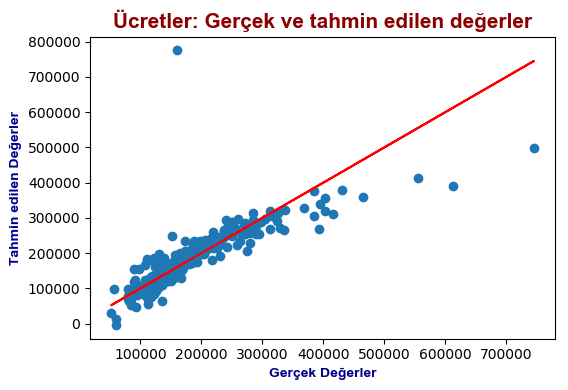

Ortalama Mutlak Hata (MAE)        : 25097.065962269808
Ortalama Kare Hata (MSE)          : 2581363847.870298
Kök Ortalama Kare Hata (RMSE)     : 50807.12398739273
Ortalama Mutlak Yüzde Hata (MAPE) : 15.008065677126265


In [7]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

modelimizin hedefin daha düşük değerlerini daha yüksek değerlerden daha iyi tahmin ettiğini görüyoruz.Değer ne kadar düşükse, modelin performansı o kadar iyi
---Ortalama mutlak hata (MAE), gerçek değerler ile tahmin edilen değerler arasındaki hataların mutlak değerlerinin ortalaması 
---Ortalama kare hata (MSE), gerçek değerler ile tahmin edilen değerler arasındaki hataların karesinin ortalaması 
---Kök ortalama kare hatası (RMSE), MSE'nin karekökü
---Ortalama mutlak yüzde hata (MAPE), hataların mutlak değerlerinin gerçek değerlere oranının ortalaması